# Library

In [26]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf, keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Dataset

## Load

In [27]:
# Download the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [28]:
# Pipeline of transformation
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

num_training_examples = x_train.shape[0]

batch_size = 64

## Visualize

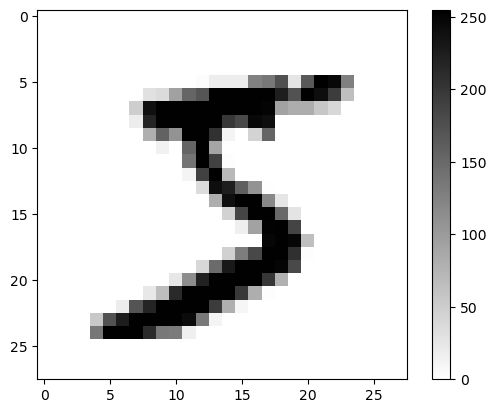

The label of this image is: 5


In [29]:
# Plot the image
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.colorbar()
plt.show()

# Print the label to check if consistent and correct
print('The label of this image is:', y_train[0])

# Model

In [ ]:
class My_Network(tf.keras.Model):
    def __init__(self, num_classes = 10):
        super().__init__()
        self.num_classes = num_classes
    
        self.input_layer = tf.keras.layers.Flatten()
        self.hidden_1 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.hidden_2 = tf.keras.layers.Dense(64, activation = 'relu')
        self.output_layer = tf.keras.layers.Dense(self.num_classes, activation = 'softmax')
    
    def call(self, input_tensor):
        x = self.input_layer(input_tensor)
        x = self.hidden_1(x)
        x = self.dropout(x)
        x = self.hidden_2(x)
        x = self.output_layer(x)
    
        return x

In [40]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Training

In [43]:
# Clear all the backend sessions
tf.keras.backend.clear_session()

# Specify the optimizer, loss function and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Start to train the model
EPOCHS = 10
history = model.fit(
    x_train, y_train, batch_size=batch_size, 
    epochs=EPOCHS, validation_split=.1
)

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 1.9552 - accuracy: 0.7937 - val_loss: 0.4038 - val_accuracy: 0.8987
Epoch 2/10
844/844 [==============================] - 2s 3ms/step - loss: 0.3722 - accuracy: 0.9009 - val_loss: 0.3106 - val_accuracy: 0.9245
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2590 - accuracy: 0.9297 - val_loss: 0.2236 - val_accuracy: 0.9420
Epoch 4/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2096 - accuracy: 0.9431 - val_loss: 0.2154 - val_accuracy: 0.9470
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.1671 - accuracy: 0.9538 - val_loss: 0.1516 - val_accuracy: 0.9607
Epoch 6/10
844/844 [==============================] - 2s 3ms/step - loss: 0.1430 - accuracy: 0.9596 - val_loss: 0.1466 - val_accuracy: 0.9628
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.1217 - accuracy: 0.9649 - val_loss: 0.1432 - val_accuracy: 0.9617
Epoch 

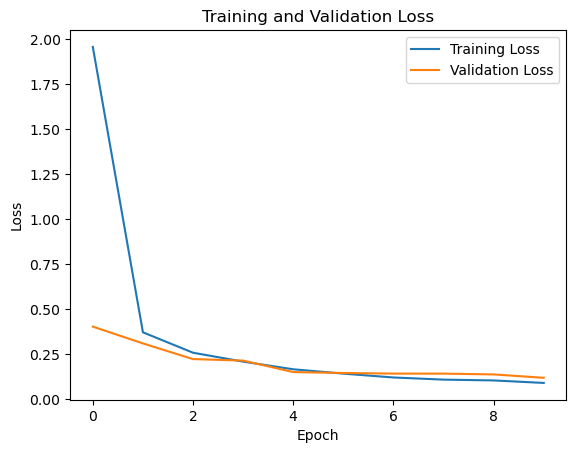

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluation

## Score

In [46]:
# Calculate loss and accuracy after training
score = model.evaluate(x_train, y_train, verbose=0)

print('\nLoss after training: {:,.3f}'.format(score[0]))
print('Accuracy after training: {:.3%}'.format(score[1]))


Loss after training: 0.079
Accuracy after training: 97.790%


In [47]:
# Calculate loss and accuracy after training
score = model.evaluate(x_test, y_test, verbose=0)

print('\nLoss after testing: {:,.3f}'.format(score[0]))
print('Accuracy after testing: {:.3%}'.format(score[1]))


Loss after testing: 0.141
Accuracy after testing: 96.580%


## Visualize

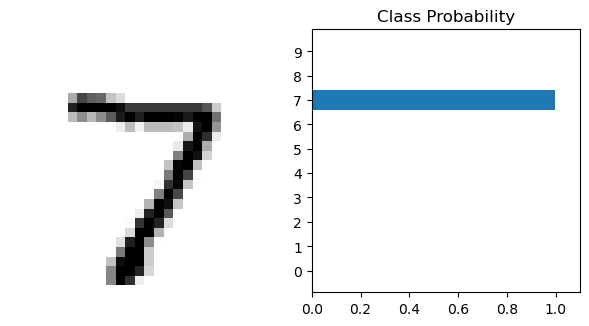

In [53]:
# Test the model
ps = model.predict(x_test[:1])
first_image, first_pred = x_test[0], ps[0]
  
  
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), first_pred)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()